<a href="https://colab.research.google.com/github/plask3189/Example1/blob/master/Project3a_MNIST_CNN_HelloWorld_DLinColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the workspace - load Keras, Tensorflow

In [85]:
from __future__ import print_function
import keras
from keras import utils
from keras.utils import plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

# Import the MNIST dataset + create variables for our test and training data

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# CNN specific shape of the data

In [87]:
# input image dimensions of MNIST data
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Preprocess the data
Note we do not shape it into a 1D vector of size 28*28 = 784 here, but rather keep the images as 28 x 28 x 1 to be used with 2D convolution layer.

Compare this preprocessing steps in the code MNIST_HelloWorld_DLinR code!

In [88]:
# rescale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


## The y data is an integer vector with values ranging from 0 to 9.  To prepare this data for training we one-hot encode the vectors into binary class matrices

In [89]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [90]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), #The layer has 32 filters/kernels, each with a size of 3x3
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
#project 3 :  the two layers should be added here to run the full code!
#model.add(Conv2D())
#model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Print the details of the model

# Build the model
Building the neural network requires configuring the layers of the model then compiling the model.

# Setup the layer


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_14 (Flatten)        (None, 9216)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               1179776   
                                                     

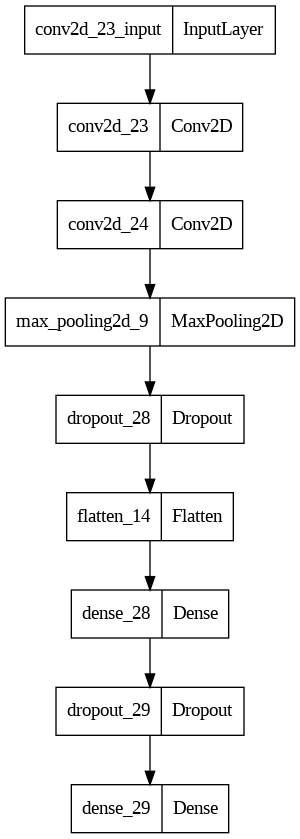

In [91]:
#keras.utils.print_summary(model)
model.summary()
# You can also plot instead
keras.utils.plot_model(model)

# Compile the model - define loss and optimizer

In [92]:
model.compile(
  loss= 'categorical_crossentropy',
  optimizer= 'adam',
  metrics='accuracy'
  )

# Train the model

In [93]:
history = model.fit(
  x_train, y_train,
  epochs=30, batch_size=128,
  validation_split=0.2
)

Epoch 1/30
375/375 [==============================] - 8s 15ms/step - loss: 0.2349 - accuracy: 0.9289 - val_loss: 0.0574 - val_accuracy: 0.9836
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.0451 - val_accuracy: 0.9869
Epoch 3/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0519 - accuracy: 0.9843 - val_loss: 0.0392 - val_accuracy: 0.9878
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 5/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0368 - val_accuracy: 0.9894
Epoch 6/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0364 - val_accuracy: 0.9894
Epoch 7/30
375/375 [==============================] - 3s 9ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0406 - val_accuracy: 0.9889
E

## The history object returned by fit() includes loss and accuracy metrics which we can plot

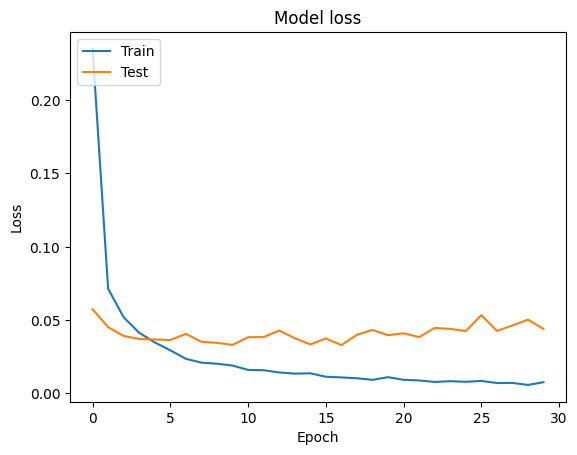

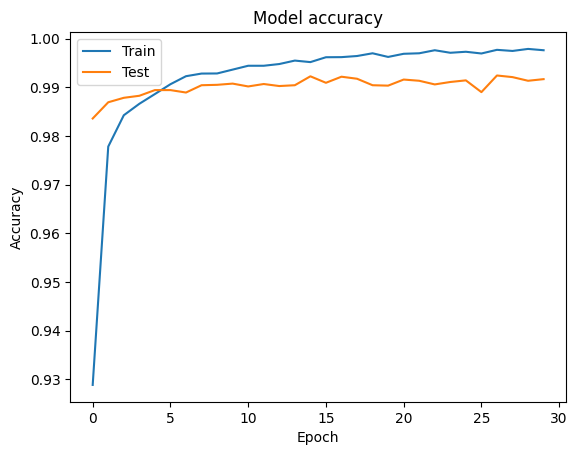

In [94]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### evaulating result

In [95]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Accessing training accuracy
training_accuracy = history.history['accuracy'][-1]  # Extracting the final training accuracy

print('Training accuracy:', training_accuracy)

Test loss: 0.03704220429062843
Test accuracy: 0.991599977016449
Training accuracy: 0.9976041913032532


# Project 3
## Add two layers after the initial convolutional layer in "Setup the layers" above
1. Convolutional layer with kernel size 3 x 3 with relu
2. Maxpool layer with size 2 x 2
### Submit the code chunk below
It should be of the form:

---
```
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
```


## Make sure you ran the full code with these two additional layers added, and report the final training accuracy value, test accuracy value.
Test loss: 0.03259246051311493

Test accuracy: 0.9904000163078308

Training accuracy: 0.9876875281333923

In [96]:
# Enter your code chunk here. Make sure to mention which AI helped you:
# With the help of ChatGPT3.5!
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
#--------------------------------------------------------------
# added convolutional layer:
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
# added maxpool layer:
model.add(MaxPooling2D(pool_size=(2, 2)))
#--------------------------------------------------------------

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))



1. Why do you need 64 filters?

    - 64 filters are used instead of 32 in the second convolutional layer because are more higher dimensional features to capture.

2. How many total layers now?

    - There are now 8 layers (excluding input layer)

3. The model with 6 layers is the original MNIST_CNN code (2,770,634), but once you add the extra two layers what happens? (xxxx.xxx) is it less or more? and why?

    - There are 1,199,882 trainable parameters now, less than the original model. This is because of the added MaxPooling layer which extracts the significant features before the dense layer magnifies the number of trainable parameters.


4. Provide the training accuracy value after the 30 epochs done, and the test accuracy value. This question is to make sure vou actuallv ran the full model :-)

    - Test accuracy after 30 epochs: 0.9904000163078308

    - Training accuracy after 30 epochs: 0.9876875281333923